# Trex Data Analysis Tutorial
__5. April 2019__

Chiara Amendola, Cristina Martin-Perez, Jonas Rembser

## What you can learn today

We will discuss some common problems in physics data analysis:
* __parameter estimation__, examples:
   * determine your detector resolution
   * obtain calibration coefficients
   
* __hypothesis testing__, examples:
   * is your assumption of a linearity valid?
   * is this process compatible with an exponential law?
   
* __uncertainty calculation__
   * always quote results with uncertainties, e.g. $E = 669 \pm 5$ keV
   * stimate both __statistic__ and __systematic__ uncertainty
   
* __Monte Carlo simulation__, for example:
   * simulate response of photomultiplier tube
   * obtain acceptance of detector with complicated geometry

## Introduction

* Examples in this presentation are based on the programming language __Python__ and libraries from it's ecosystem
* Many alternatives exists, but Python emerges as industry standard
* This is not an introduction to Python, it assumes you are a bit familiar with it
* There are a lot of resources on the internet:
  * Python website: <https://www.python.org>
  * Python tutorials: <https://docs.python.org/2/tutorial/>
  * Google $\to$ <https://www.stackoverflow.com>

## Software we use in data analysis around Python

The Python ecosystem established itself __the standard__ for modern data analysis, of which you will use today:

* the Python programming language
* the NumPy library for handling numerical data and linear algebra
* the SciPy library for scientific computing
* matplotlib to easily make nice plots
* the Jupyter Notebook to interactively work with Python
  * this presentation is actually a notebook itselt, which you can find here

More specific to High Energy Physics (HEP), there is also ROOT (developed by CERN), a modular scientific software toolkit. For the Trex, we stick with the more general python ecosystem, since these are skills you can transfer anywhere else, while ROOT is only used in HEP.

## Reminders about Python

* Syntax is "similar" to english

In [42]:
print("salut tout le monde")

salut tout le monde


* No explicit types for variables

In [43]:
n = 1
s = "one"
print(n, s)

1 one


* Blocks of code (if-else, for loops, ...) are denoted using indentation

In [45]:
number1 = 5.5
number2 = -5.5

if number1 > 0:
    print(number1, "is > 0")
else:
    print(number1, "is <= 0")
    
if number2 > 0:
    print(number2, "is > 0")
else:
    print(number2, "is <= 0")

5.5 is > 0
-5.5 is <= 0


* Lists can contain multiple, ordered, heterogeneous values

In [51]:
mylist = [1, 2, None, 4, "was guckst du"]
for x in mylist:
    print(x)

1
2
None
4
was guckst du


* You can define functions and call them using positional or keyword arguments
  * you can also define [classes](https://docs.python.org/3.6/tutorial/classes.html)
  * remember that Python always passes references to functions, not copies (unlike C++ for example)

In [50]:
def divide(num, den):
    return num/den

x1 = divide(10, 5)
x2 = divide(num=10, den=5)

print(x1, x2)

2.0 2.0


* You can import libraries and use their functionalities:

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

* In the Jupyter notebook, the return value of the last command in the cell is automatically printed

In [57]:
1 + 2 + 3 + 4 + 5 + 6

21

## Pseudorandom numbers

To generate __random data to try out our tools__, we will generate __pseudorandom numbers__.

* number generated by mathematical formulae with statistical properties close to the ones of random numbers.
* a good algorithm should not present a correlation between the generated numbers
* generation of pseudorandom numbers is reporducible: you will get the same numbers if you start from the same seed

_Example_: the __Linear Congruential Generator__ $x_{n+1} = a x_n + c$ mod $m$.

In [31]:
def linear_congruential(size, seed=1, a=7**5, c=0, m=2**31):
    n = np.prod(size)
    x = np.empty(n)
    x[0] = seed
    for i in range(1,n):
        x[i] = (a*x[i-1] + c) % m
    return x.reshape(size) / m

With the wrong choice of $a, c$ and $m$, the __Linear Congruential Generator__ shows an obvious non-random pattern.

In [32]:
x1 = linear_congruential((2,500), seed=1, a=7**5, c=0, m=2**31)
x2 = linear_congruential((2,500), seed=1, a=13, c=0, m=31)

In [35]:
def linear_congruential_plot(x1, x2):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    ax1.scatter(x1[0], x1[1], s=2, color='k')
    ax2.scatter(x2[0], x2[1], s=2, color='k')
    ax1.set_xlim(0,1); ax1.set_ylim(0,1); ax2.set_xlim(0,1); ax2.set_ylim(0,1)
    ax1.set_title(r'$a = 7^5$,   $c=0$,   $m=2^{31}$')
    ax2.set_title(r'$a = 13$,   $c=0$,   $m=31$')
    ax1.set_xlabel(r'$x_1^1$')
    ax1.set_ylabel(r'$x_1^2$')
    ax2.set_xlabel(r'$x_2^1$')
    ax2.set_ylabel(r'$x_2^2$')
    plt.show()

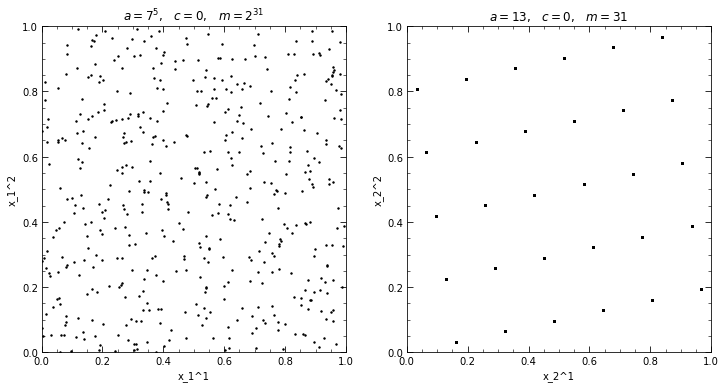

In [36]:
linear_congruential_plot(x1, x2)

## Pseudorandom numbers in Python

Python and numpy use the [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister) algorithm for pseudorandom number generation. We can set the seed for numpy with `np.random.seed()` to get reproducible results and use the [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html) module to generate arrays of random numbers according to many different probability density functions, for example a __uniform distribution__:

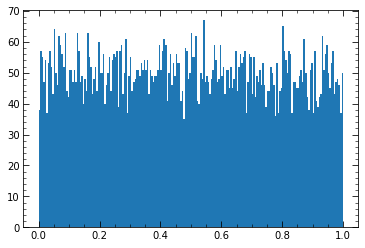

In [75]:
np.random.seed(42)

a = np.random.uniform(size=10000)
plt.hist(a, bins=200)
plt.show()

## Histograms

A __histogram__ is a representation of the distribution of numerical data. The [numpy.histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) function returns you the number of counts in each __bin__, with the bins being defined by the __bin edges__ you pass as a second argument.

In [109]:
data = [1, 2, 3, 3, 3, 5, 1, 0, -1, 4]
bins = np.linspace(-6, 6, 21)

np.histogram(data, bins)

(array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 3, 1, 0, 1, 0]),
 array([-6. , -5.4, -4.8, -4.2, -3.6, -3. , -2.4, -1.8, -1.2, -0.6,  0. ,
         0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]))

The `numpy.histogram` function returns you:
* the number of counts in each bin
* the bin edges (redundant information here since we already specified them)

You can also fill histograms with random values, here for example according to a __normal distribution__:

In [110]:
a = np.random.normal(loc=0.0, scale=2.0, size=1000)
np.histogram(a, bins)

(array([  4,   4,  10,  23,  22,  38,  64, 114, 108, 107, 112, 117,  81,
         64,  57,  29,  23,  16,   3,   1]),
 array([-6. , -5.4, -4.8, -4.2, -3.6, -3. , -2.4, -1.8, -1.2, -0.6,  0. ,
         0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]))

It's also very convenient to plot histograms directly with the [matplotlib.pyplot.hist](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function, which uses the same interface:

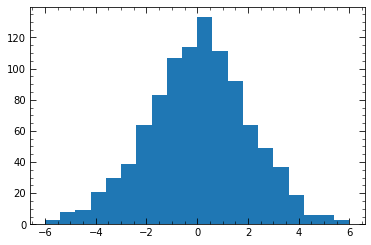

In [116]:
a = np.random.normal(loc=0.0, scale=2.0, size=1000)

plt.hist(a, bins)
plt.show()

However, the  `numpy` function is still very useful in case you want to do something with the counts before plotting, them, for example to calculate the __Poissonian uncertainy__:

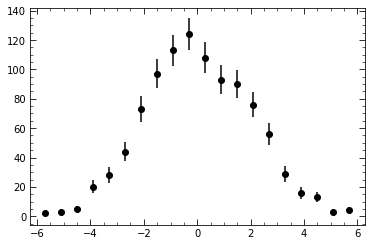

In [117]:
a = np.random.normal(loc=0.0, scale=2.0, size=1000)

counts, _ = np.histogram(a, bins)
uncert = np.sqrt(counts)
bincenters = (bins[1:] + bins[:-1])/2.

plt.errorbar(bincenters, counts, yerr=uncert, fmt='o', color='k')
plt.show()

Having the numpy array with the counts and uncertainties also helps you when you want to __fit your data__ (more on fitting later):

In [118]:
def gaus(x, mu, sigma, N):
    return N * 1./(np.sqrt(2*np.pi)*sigma) * np.exp(-(x - mu)**2/(2*sigma**2))

popt, pcov = curve_fit(gaus, bincenters, counts,
                       sigma=uncert, p0=[1., 1., 1000.])

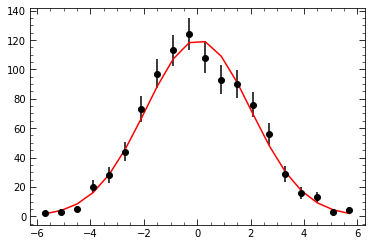

In [119]:
plt.plot(bincenters, gaus(bincenters, *popt), "r")
plt.errorbar(bincenters, counts, yerr=uncert, fmt='o', color='k')
plt.show()

## Fitting the data

Let's create some toy data which is distributed according to $121 /\sqrt{2x}$, plus some Gaussian noise.

In [147]:
def f_true(x):
    return 121./np.sqrt(2.*x)

In [148]:
def f_noise(x):
    return np.random.normal(loc=0.0, scale=5., size=x.shape)

In [149]:
def f_measurement(x):
    return f_true(x) + f_noise(x)

In [150]:
x = np.linspace(1., 10., 20)
y = f_measurement(x)
yerr = np.sqrt(y)

In [151]:
def data_and_true_function_plot(x, y, yerr, f_true):
    xx = np.linspace(1.,10.,200)
    plt.plot(xx, f_true(xx), label="true distribution")
    plt.errorbar(x, y, yerr=yerr, fmt='o', color='k', label="data")
    plt.legend(loc="upper right")
    plt.xlabel("Amplitude")
    plt.ylabel("Counts")
    plt.show()

In [152]:
def data_plot(x, y, yerr):
    plt.errorbar(x, y, yerr=yerr, fmt='o', color='k', label="data")
    plt.legend(loc="upper right")
    plt.xlabel("Amplitude")
    plt.ylabel("Counts")
    plt.show()

This is a visualization of our "measured" data and the underlying function:

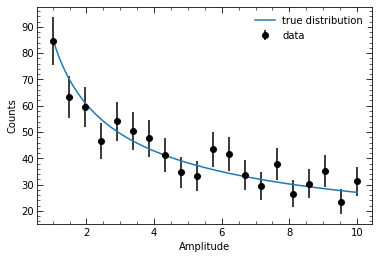

In [153]:
data_and_true_function_plot(x, y, yerr, f_true)

In a real experiment, you find youself rather in the following situation:

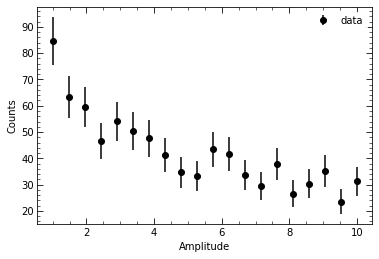

In [154]:
data_plot(x, y, yerr)

The you don't know the underlying function! But you want to fit it in order to estimate the parameters $a$ and $b$ in the model $a/\sqrt{bx}$.

How is this done?